# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
# Print the city count to confirm sufficient count
len(cities)

630

In [4]:
# replace spaces in city names
cities = [i.replace(' ', '+') for i in cities]

for i in cities:
    print(i)

fort+smith
taquari
grand+gaube
attawapiskat
albany
port+alfred
butaritari
nurota
saint+george
punta+arenas
bluff
pangai
indiaroba
upernavik
kodiak
vila+franca+do+campo
denpasar
mincivan
puerto+ayora
tuktoyaktuk
hermanus
antalaha
los+llanos+de+aridane
armacao+dos+buzios
rikitea
norman+wells
suntar
carnarvon
busselton
taolanaro
ushuaia
vaini
chivilcoy
kruisfontein
hihifo
kapaa
mchinji
skowhegan
deniliquin
castellaneta
abeche
maniitsoq
mataura
youghal
shenjiamen
constitucion
saint-philippe
hithadhoo
tsabong
souillac
lagoa
pestovo
shingu
castro
duverge
bambous+virieux
mahebourg
port+lincoln
varzelandia
gainesville
airai
berlevag
hilo
la+ronge
kazalinsk
bengkulu
qaanaaq
hushitai
bredasdorp
belushya+guba
cabo+san+lucas
vaitupu
hobart
mys+shmidta
jamestown
fortuna
vila+velha
balikpapan
calabozo
fairbanks
cape+town
amderma
keti+bandar
bethel
nizhneyansk
henties+bay
cam+ranh
avarua
tabou
boquira
saldanha
aden
tasiilaq
feijo
kavieng
jinji
hasaki
atuona
pisco
north+bend
hearst
bud
yellowknife
mvu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_data = []

base_url = f'https://api.openweathermap.org/data/2.5/weather?'

counter = 0

for city in cities:
    counter = counter + 1
    print(f'Making request number {counter} for current weather data in {city}.')
    
    try:
        url = f'{base_url}q={city}&appid={weather_api_key}'
        response = requests.get(url).json()
        weather_data.append(response)
        
    except:
        print(f'City not found. Skipping...')

Making request number 1 for current weather data in fort+smith.
Making request number 2 for current weather data in taquari.
Making request number 3 for current weather data in grand+gaube.
Making request number 4 for current weather data in attawapiskat.
Making request number 5 for current weather data in albany.
Making request number 6 for current weather data in port+alfred.
Making request number 7 for current weather data in butaritari.
Making request number 8 for current weather data in nurota.
Making request number 9 for current weather data in saint+george.
Making request number 10 for current weather data in punta+arenas.
Making request number 11 for current weather data in bluff.
Making request number 12 for current weather data in pangai.
Making request number 13 for current weather data in indiaroba.
Making request number 14 for current weather data in upernavik.
Making request number 15 for current weather data in kodiak.
Making request number 16 for current weather data in

Making request number 130 for current weather data in geraldton.
Making request number 131 for current weather data in ratnagiri.
Making request number 132 for current weather data in omsukchan.
Making request number 133 for current weather data in gazimurskiy+zavod.
Making request number 134 for current weather data in saskylakh.
Making request number 135 for current weather data in san+quintin.
Making request number 136 for current weather data in homer.
Making request number 137 for current weather data in huaraz.
Making request number 138 for current weather data in jabinyanah.
Making request number 139 for current weather data in sitka.
Making request number 140 for current weather data in anadyr.
Making request number 141 for current weather data in yulara.
Making request number 142 for current weather data in dingle.
Making request number 143 for current weather data in kinlochleven.
Making request number 144 for current weather data in rosita.
Making request number 145 for curr

Making request number 258 for current weather data in muros.
Making request number 259 for current weather data in tucuma.
Making request number 260 for current weather data in mergui.
Making request number 261 for current weather data in saint-augustin.
Making request number 262 for current weather data in macapa.
Making request number 263 for current weather data in ancud.
Making request number 264 for current weather data in nelson+bay.
Making request number 265 for current weather data in lorengau.
Making request number 266 for current weather data in finnsnes.
Making request number 267 for current weather data in saleaula.
Making request number 268 for current weather data in fare.
Making request number 269 for current weather data in ahipara.
Making request number 270 for current weather data in saint-pierre.
Making request number 271 for current weather data in lompoc.
Making request number 272 for current weather data in tapes.
Making request number 273 for current weather data

Making request number 386 for current weather data in maiduguri.
Making request number 387 for current weather data in tuatapere.
Making request number 388 for current weather data in sorong.
Making request number 389 for current weather data in senica.
Making request number 390 for current weather data in xam+nua.
Making request number 391 for current weather data in ribeira+brava.
Making request number 392 for current weather data in shagonar.
Making request number 393 for current weather data in kyra.
Making request number 394 for current weather data in mala.
Making request number 395 for current weather data in kafue.
Making request number 396 for current weather data in half+moon+bay.
Making request number 397 for current weather data in sorland.
Making request number 398 for current weather data in beloha.
Making request number 399 for current weather data in miandrivazo.
Making request number 400 for current weather data in malakal.
Making request number 401 for current weather

Making request number 515 for current weather data in aloleng.
Making request number 516 for current weather data in bekhtery.
Making request number 517 for current weather data in ponta+delgada.
Making request number 518 for current weather data in comodoro+rivadavia.
Making request number 519 for current weather data in altay.
Making request number 520 for current weather data in saint-paul.
Making request number 521 for current weather data in amapa.
Making request number 522 for current weather data in pitimbu.
Making request number 523 for current weather data in manzanillo.
Making request number 524 for current weather data in butare.
Making request number 525 for current weather data in nabire.
Making request number 526 for current weather data in izumo.
Making request number 527 for current weather data in galesong.
Making request number 528 for current weather data in hami.
Making request number 529 for current weather data in kasongo.
Making request number 530 for current wea

In [6]:
pprint(weather_data)

[{'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 35.3859, 'lon': -94.3986},
  'dt': 1615078098,
  'id': 4111410,
  'main': {'feels_like': 283.11,
           'humidity': 29,
           'pressure': 1025,
           'temp': 286.39,
           'temp_max': 289.15,
           'temp_min': 283.15},
  'name': 'Fort Smith',
  'sys': {'country': 'US',
          'id': 4141,
          'sunrise': 1615034428,
          'sunset': 1615076243,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 96, 'speed': 1.05}},
 {'base': 'stations',
  'clouds': {'all': 24},
  'cod': 200,
  'coord': {'lat': -29.7997, 'lon': -51.8644},
  'dt': 1615078305,
  'id': 3446783,
  'main': {'feels_like': 293.72,
           'humidity': 85,
           'pressure': 1000,
           'temp': 292.59,
           'temp_max': 293.71,
         

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 280, 'gust': 11.83, 'speed': 8.75}},
 {'base': 'stations',
  'clouds': {'all': 91},
  'cod': 200,
  'coord': {'lat': 62.1444, 'lon': 117.6319},
  'dt': 1615078313,
  'id': 2015913,
  'main': {'feels_like': 257.21,
           'grnd_level': 996,
           'humidity': 96,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 261.66,
           'temp_max': 261.66,
           'temp_min': 261.66},
  'name': 'Suntar',
  'sys': {'country': 'RU', 'sunrise': 1615071245, 'sunset': 1615110439},
  'timezone': 32400,
  'visibility': 1113,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 197, 'speed': 1.79}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -24.8667, 'lon': 113.6333},

  'main': {'feels_like': 285.72,
           'grnd_level': 1013,
           'humidity': 88,
           'pressure': 1016,
           'sea_level': 1016,
           'temp': 287.51,
           'temp_max': 287.51,
           'temp_min': 287.51},
  'name': 'Constitución',
  'sys': {'country': 'CL', 'sunrise': 1615027274, 'sunset': 1615072847},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 199, 'speed': 3.62}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -21.3585, 'lon': 55.7679},
  'dt': 1615078320,
  'id': 935215,
  'main': {'feels_like': 298.51,
           'humidity': 94,
           'pressure': 1000,
           'temp': 295.32,
           'temp_max': 297.15,
           'temp_min': 293.15},
  'name': 'Saint-Philippe',
  'rain': {'1h': 0.33},
  'sys': {'country': 'RE',
          'id': 2127,
          'sunrise':

  'id': 6050066,
  'main': {'feels_like': 274.46,
           'humidity': 61,
           'pressure': 1004,
           'temp': 278.15,
           'temp_max': 279.15,
           'temp_min': 277.15},
  'name': 'La Ronge',
  'sys': {'country': 'CA',
          'id': 696,
          'sunrise': 1615037889,
          'sunset': 1615078006,
          'type': 1},
  'timezone': -21600,
  'visibility': 632,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 330, 'speed': 2.06}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -3.8004, 'lon': 102.2655},
  'dt': 1615078157,
  'id': 1649150,
  'main': {'feels_like': 297.98,
           'grnd_level': 1012,
           'humidity': 87,
           'pressure': 1014,
           'sea_level': 1014,
           'temp': 295.94,
           'temp_max': 295.94,
           'temp_min': 29

  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 350, 'speed': 2.57}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -21.2078, 'lon': -159.775},
  'dt': 1615078099,
  'id': 4035715,
  'main': {'feels_like': 302.89,
           'humidity': 78,
           'pressure': 1007,
           'temp': 301.15,
           'temp_max': 301.15,
           'temp_min': 301.15},
  'name': 'Avarua',
  'rain': {'1h': 1.24},
  'sys': {'country': 'CK',
          'id': 7271,
          'sunrise': 1615048702,
          'sunset': 1615093343,
          'type': 1},
  'timezone': -36000,
  'visibility': 10000,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 270, 'speed': 5.66}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod':

           'temp_max': 295.31,
           'temp_min': 295.31},
  'name': 'Tanout',
  'sys': {'country': 'NE', 'sunrise': 1615095464, 'sunset': 1615138408},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 66, 'speed': 4.69}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 36.6177, 'lon': -121.9166},
  'dt': 1615078200,
  'id': 5380437,
  'main': {'feels_like': 282.65,
           'humidity': 79,
           'pressure': 1019,
           'temp': 284.93,
           'temp_max': 285.93,
           'temp_min': 283.71},
  'name': 'Pacific Grove',
  'sys': {'country': 'US',
          'id': 2008282,
          'sunrise': 1615041065,
          'sunset': 1615082812,
          'type': 3},
  'timezone': -28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id':

           'temp_min': 296.4},
  'name': 'Umluj',
  'sys': {'country': 'SA', 'sunrise': 1615088893, 'sunset': 1615131358},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 342, 'speed': 3.75}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 60.9167, 'lon': -46.05},
  'dt': 1615078344,
  'id': 3421719,
  'main': {'feels_like': 271.22,
           'humidity': 36,
           'pressure': 1004,
           'temp': 279.15,
           'temp_max': 279.15,
           'temp_min': 279.15},
  'name': 'Narsaq',
  'snow': {'1h': 0.35},
  'sys': {'country': 'GL',
          'id': 47,
          'sunrise': 1615024125,
          'sunset': 1615063343,
          'type': 1},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               '

          'id': 2010117,
          'sunrise': 1615100202,
          'sunset': 1615140319,
          'type': 3},
  'timezone': 0,
  'visibility': 1025,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 231, 'speed': 1.81}},
 {'base': 'stations',
  'clouds': {'all': 4},
  'cod': 200,
  'coord': {'lat': 13.9268, 'lon': -84.4032},
  'dt': 1615078349,
  'id': 3618337,
  'main': {'feels_like': 298.4,
           'grnd_level': 1006,
           'humidity': 90,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 295.3,
           'temp_max': 295.3,
           'temp_min': 295.3},
  'name': 'Rosita',
  'sys': {'country': 'NI', 'sunrise': 1615031458, 'sunset': 1615074415},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 5

          'sunset': 1615081756,
          'type': 1},
  'timezone': -28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 260, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 35.1333, 'lon': 140.3},
  'dt': 1615078355,
  'id': 2112309,
  'main': {'feels_like': 274.28,
           'humidity': 65,
           'pressure': 1029,
           'temp': 280.41,
           'temp_max': 280.93,
           'temp_min': 279.82},
  'name': 'Katsuura',
  'sys': {'country': 'JP',
          'id': 8074,
          'sunrise': 1615064464,
          'sunset': 1615106341,
          'type': 1},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 50, 'speed': 6.17}},
 {'base': 'stations',
  'clou

           'grnd_level': 953,
           'humidity': 24,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 299.55,
           'temp_max': 299.55,
           'temp_min': 299.55},
  'name': 'Kembé',
  'sys': {'country': 'CF', 'sunrise': 1615092118, 'sunset': 1615135516},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 177, 'speed': 0.99}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 38},
  'cod': 200,
  'coord': {'lat': 44.1628, 'lon': 80},
  'dt': 1615078220,
  'id': 1520253,
  'main': {'feels_like': 271.58,
           'grnd_level': 941,
           'humidity': 70,
           'pressure': 1017,
           'sea_level': 1017,
           'temp': 274.55,
           'temp_max': 274.55,
           'temp_min': 274.55},
  'name': 'Zharkent',
  'sys': {'country': 'KZ', 'sunris

               'main': 'Clouds'}],
  'wind': {'deg': 220, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -1.5843, 'lon': 14.2591},
  'dt': 1615078370,
  'id': 2399831,
  'main': {'feels_like': 298.28,
           'grnd_level': 954,
           'humidity': 70,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 297.48,
           'temp_max': 297.48,
           'temp_min': 297.48},
  'name': 'Lékoni',
  'sys': {'country': 'GA', 'sunrise': 1615093812, 'sunset': 1615137482},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 207, 'speed': 3.16}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -12.5211, 'lon': -76.7372},
  'dt': 1615078370,
  'id': 3943957,
  'main': {'feels_like': 296.68,
           'humidity': 78,
           'pressure':

  'id': 3577430,
  'main': {'feels_like': 299.94,
           'humidity': 73,
           'pressure': 1017,
           'temp': 298.88,
           'temp_max': 299.15,
           'temp_min': 298.71},
  'name': 'Road Town',
  'sys': {'country': 'VG',
          'id': 8799,
          'sunrise': 1615026820,
          'sunset': 1615069558,
          'type': 1},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 100, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 10.6038, 'lon': -67.0303},
  'dt': 1615078376,
  'id': 3646190,
  'main': {'feels_like': 300.32,
           'humidity': 73,
           'pressure': 1010,
           'temp': 298.15,
           'temp_max': 298.15,
           'temp_min': 298.15},
  'name': 'Catia La Mar',
  'sys': {'country': 'VE',
          'id': 8759,
          'sunrise': 161502

  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 205, 'speed': 2.27}},
 {'base': 'stations',
  'clouds': {'all': 92},
  'cod': 200,
  'coord': {'lat': 69.7008, 'lon': 170.3133},
  'dt': 1615078384,
  'id': 2122090,
  'main': {'feels_like': 236.12,
           'grnd_level': 989,
           'humidity': 85,
           'pressure': 996,
           'sea_level': 996,
           'temp': 244.12,
           'temp_max': 244.12,
           'temp_min': 244.12},
  'name': 'Pevek',
  'sys': {'country': 'RU', 'sunrise': 1615059547, 'sunset': 1615096854},
  'timezone': 43200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 158, 'speed': 5.93}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 42.7762, 'lon': -9.0603},


  'dt': 1615078242,
  'id': 3430545,
  'main': {'feels_like': 296.52,
           'humidity': 70,
           'pressure': 1015,
           'temp': 295.08,
           'temp_max': 295.37,
           'temp_min': 294.82},
  'name': 'Morón',
  'sys': {'country': 'AR',
          'id': 2008838,
          'sunrise': 1615023986,
          'sunset': 1615069513,
          'type': 3},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 28, 'gust': 2.68, 'speed': 0.89}},
 {'base': 'stations',
  'clouds': {'all': 97},
  'cod': 200,
  'coord': {'lat': 9.0622, 'lon': -62.051},
  'dt': 1615078391,
  'id': 3625929,
  'main': {'feels_like': 299.48,
           'grnd_level': 1013,
           'humidity': 91,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 296.4,
           'temp_max': 296.4,
           'temp_min': 296.4},
  'name': 'Tucup

  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 190, 'speed': 2.06}},
 {'base': 'stations',
  'clouds': {'all': 19},
  'cod': 200,
  'coord': {'lat': 46.5644, 'lon': 3.355},
  'dt': 1615078397,
  'id': 2967166,
  'main': {'feels_like': 270.43,
           'humidity': 93,
           'pressure': 1024,
           'temp': 272.94,
           'temp_max': 273.15,
           'temp_min': 272.59},
  'name': 'Yzeure',
  'sys': {'country': 'FR',
          'id': 6499,
          'sunrise': 1615097695,
          'sunset': 1615138832,
          'type': 1},
  'timezone': 3600,
  'visibility': 5000,
  'weather': [{'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 0, 'speed': 0.51}},
 {'base': 'stations',
  'clouds': {'all': 93},
  'cod': 200,
  'coord': {'lat': 57.1167, 'lon': 8.6167},
  'dt': 1

  'sys': {'country': 'RU',
          'id': 8957,
          'sunrise': 1615076982,
          'sunset': 1615117091,
          'type': 1},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'light snow',
               'icon': '13d',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 220, 'gust': 10, 'speed': 5}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 5.9667, 'lon': 80.4167},
  'dt': 1615078406,
  'id': 1223738,
  'main': {'feels_like': 299.81,
           'grnd_level': 1009,
           'humidity': 84,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 296.87,
           'temp_max': 296.87,
           'temp_min': 296.87},
  'name': 'Weligama',
  'sys': {'country': 'LK', 'sunrise': 1615078104, 'sunset': 1615121440},
  'timezone': 19800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'mai

           'humidity': 64,
           'pressure': 1018,
           'sea_level': 1018,
           'temp': 279,
           'temp_max': 279,
           'temp_min': 279},
  'name': 'Sabzawār',
  'sys': {'country': 'IR', 'sunrise': 1615084306, 'sunset': 1615126148},
  'timezone': 12600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 75, 'speed': 1.16}},
 {'base': 'stations',
  'clouds': {'all': 25},
  'cod': 200,
  'coord': {'lat': -25.1667, 'lon': 46.0833},
  'dt': 1615078413,
  'id': 1079048,
  'main': {'feels_like': 298,
           'grnd_level': 994,
           'humidity': 88,
           'pressure': 1009,
           'sea_level': 1009,
           'temp': 295.56,
           'temp_max': 295.56,
           'temp_min': 295.56},
  'name': 'Ambovombe',
  'rain': {'1h': 0.11},
  'sys': {'country': 'MG', 'sunrise': 1615085596, 'sunset': 1615130425},
  'timezone': 10800,
 

  'wind': {'deg': 260, 'speed': 4.63}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 26.5579, 'lon': 54.8807},
  'dt': 1615078422,
  'id': 141665,
  'main': {'feels_like': 292.63,
           'humidity': 64,
           'pressure': 1010,
           'temp': 293.15,
           'temp_max': 293.15,
           'temp_min': 293.15},
  'name': 'Bandar-e Lengeh',
  'sys': {'country': 'IR',
          'id': 7448,
          'sunrise': 1615084708,
          'sunset': 1615127091,
          'type': 1},
  'timezone': 12600,
  'visibility': 8000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 20, 'speed': 2.06}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 45.9454, 'lon': -66.6656},
  'dt': 1615078135,
  'id': 5957776,
  'main': {'feels_like': 262.18,
           'humidity': 50,
           

  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 158, 'speed': 1.8}},
 {'base': 'stations',
  'clouds': {'all': 66},
  'cod': 200,
  'coord': {'lat': -19.5167, 'lon': 45.4667},
  'dt': 1615078429,
  'id': 1059051,
  'main': {'feels_like': 300.14,
           'grnd_level': 997,
           'humidity': 89,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 296.44,
           'temp_max': 296.44,
           'temp_min': 296.44},
  'name': 'Miandrivazo',
  'sys': {'country': 'MG', 'sunrise': 1615085899, 'sunset': 1615130419},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 14, 'speed': 0.96}},
 {'base': 'stations',
  'clouds': {'all': 56},
  'cod': 200,
  'coord': {'lat': 9.5334, 'lon': 31.6605},
  'dt': 1615078429,
 

           'humidity': 38,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 295.17,
           'temp_max': 295.17,
           'temp_min': 295.17},
  'name': 'Codrington',
  'sys': {'country': 'AU', 'sunrise': 1615062130, 'sunset': 1615107875},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 257, 'speed': 2.22}},
 {'base': 'stations',
  'clouds': {'all': 80},
  'cod': 200,
  'coord': {'lat': 65.9939, 'lon': 57.5281},
  'dt': 1615078436,
  'id': 863061,
  'main': {'feels_like': 239.53,
           'grnd_level': 998,
           'humidity': 88,
           'pressure': 1007,
           'sea_level': 1007,
           'temp': 243.48,
           'temp_max': 243.48,
           'temp_min': 243.48},
  'name': 'Usinsk',
  'sys': {'country': 'RU', 'sunrise': 1615086026, 'sunset': 1615124503},
  'timezone': 10800,
  'visib

  'sys': {'country': 'RU',
          'id': 9033,
          'sunrise': 1615089994,
          'sunset': 1615130203,
          'type': 1},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 200, 'speed': 6}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 10.0667, 'lon': 34.5333},
  'dt': 1615078210,
  'id': 343292,
  'main': {'feels_like': 290.54,
           'grnd_level': 845,
           'humidity': 26,
           'pressure': 1007,
           'sea_level': 1007,
           'temp': 294.05,
           'temp_max': 294.05,
           'temp_min': 294.05},
  'name': 'Āsosa',
  'sys': {'country': 'ET', 'sunrise': 1615089202, 'sunset': 1615132362},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clo

          'sunrise': 1615026099,
          'sunset': 1615066831,
          'type': 1},
  'timezone': -12600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 180, 'gust': 7.72, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 2},
  'cod': 200,
  'coord': {'lat': -34.5833, 'lon': 150.8552},
  'dt': 1615078451,
  'id': 6255012,
  'main': {'feels_like': 298.19,
           'humidity': 61,
           'pressure': 1009,
           'temp': 297.14,
           'temp_max': 297.59,
           'temp_min': 296.48},
  'name': 'Flinders',
  'sys': {'country': 'AU',
          'id': 2033627,
          'sunrise': 1615060136,
          'sunset': 1615105603,
          'type': 3},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'d

               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 1.88}},
 {'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': 62.6323, 'lon': 17.9379},
  'dt': 1615078457,
  'id': 2707684,
  'main': {'feels_like': 259.61,
           'humidity': 46,
           'pressure': 998,
           'temp': 269.39,
           'temp_max': 269.82,
           'temp_min': 269.15},
  'name': 'Härnösand',
  'sys': {'country': 'SE',
          'id': 1767,
          'sunrise': 1615095161,
          'sunset': 1615134368,
          'type': 1},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 310, 'gust': 14.92, 'speed': 9.26}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 16.5167, 'lon': -98.75},
  'dt': 1615078458,
  'id': 3516171,
  'main': {'feels_li

  'name': 'Bekhtery',
  'sys': {'country': 'UA', 'sunrise': 1615090747, 'sunset': 1615131893},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 277, 'speed': 3.01}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 37.7333, 'lon': -25.6667},
  'dt': 1615078465,
  'id': 3372783,
  'main': {'feels_like': 285.08,
           'humidity': 100,
           'pressure': 1031,
           'temp': 288.15,
           'temp_max': 288.15,
           'temp_min': 288.15},
  'name': 'Ponta Delgada',
  'sys': {'country': 'PT',
          'id': 6899,
          'sunrise': 1615018025,
          'sunset': 1615059660,
          'type': 1},
  'timezone': -3600,
  'visibility': 5000,
  'weather': [{'description': 'light intensity drizzle',
               'icon': '09n',
               'id': 300,
               'main': 'Drizzle'},
           

 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 47.6931, 'lon': 40.1025},
  'dt': 1615078472,
  'id': 528242,
  'main': {'feels_like': 259.32,
           'humidity': 92,
           'pressure': 1023,
           'temp': 263.15,
           'temp_max': 263.15,
           'temp_min': 263.15},
  'name': 'Mayskiy',
  'sys': {'country': 'RU',
          'id': 8971,
          'sunrise': 1615088935,
          'sunset': 1615129956,
          'type': 1},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 310, 'speed': 1}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -28.4478, 'lon': 21.2561},
  'dt': 1615078455,
  'id': 945945,
  'main': {'feels_like': 295.64,
           'humidity': 29,
           'pressure': 1018,
           'temp': 297.15,
           'temp_max': 297.15,
           'temp_min

  'main': {'feels_like': 305.02,
           'humidity': 74,
           'pressure': 1010,
           'temp': 302.15,
           'temp_max': 302.15,
           'temp_min': 302.15},
  'name': 'Isangel',
  'sys': {'country': 'VU',
          'id': 7317,
          'sunrise': 1615056179,
          'sunset': 1615100724,
          'type': 1},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 180, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 39},
  'cod': 200,
  'coord': {'lat': 52.3038, 'lon': 21.1602},
  'dt': 1615078479,
  'id': 753276,
  'main': {'feels_like': 272.31,
           'humidity': 72,
           'pressure': 1019,
           'temp': 274.97,
           'temp_max': 275.93,
           'temp_min': 274.26},
  'name': 'Zielonka',
  'sys': {'country': 'PL',
          'id': 2002467,
          'sunrise': 1615093691,
          'sun

  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 267, 'gust': 9.83, 'speed': 6.71}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -0.9492, 'lon': 100.3543},
  'dt': 1615078485,
  'id': 1633419,
  'main': {'feels_like': 299.13,
           'humidity': 100,
           'pressure': 1014,
           'temp': 295.15,
           'temp_max': 295.15,
           'temp_min': 295.15},
  'name': 'Padang',
  'rain': {'1h': 1.15},
  'sys': {'country': 'ID',
          'id': 9423,
          'sunrise': 1615073166,
          'sunset': 1615116809,
          'type': 1},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 0, 'speed': 1.03}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,

  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 30, 'speed': 2.57}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 26.1842, 'lon': 127.7558},
  'dt': 1615078493,
  'id': 1855342,
  'main': {'feels_like': 293.57,
           'humidity': 94,
           'pressure': 1017,
           'temp': 293.69,
           'temp_max': 294.15,
           'temp_min': 293.15},
  'name': 'Nishihara',
  'sys': {'country': 'JP',
          'id': 8137,
          'sunrise': 1615067221,
          'sunset': 1615109604,
          'type': 1},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 110, 'speed': 5.14}},
 {'base': 'stations',
  'clouds': {'all': 54},
  'cod': 200,
  'coord': {'lat': 13.35, 'lon': -15.75},
  'dt': 16150784

  'wind': {'deg': 191, 'speed': 0.56}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 25.5198, 'lon': 90.2201},
  'dt': 1615078500,
  'id': 1254046,
  'main': {'feels_like': 290.87,
           'grnd_level': 970,
           'humidity': 81,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 290.65,
           'temp_max': 290.65,
           'temp_min': 290.65},
  'name': 'Tura',
  'sys': {'country': 'IN', 'sunrise': 1615076206, 'sunset': 1615118633},
  'timezone': 19800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 105, 'speed': 1.59}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 46.0833, 'lon': 127.4},
  'dt': 1615078500,
  'id': 2038421,
  'main': {'feels_like': 257.49,
           'humidity': 37,
           'pressure': 994,
           'temp': 265.37,
           'temp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# empty lists to store values
name_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []
cloud_list = []
humidity_list = []

# use a counter to index into appropriate dictionary within weather_data
line_tracker = 0

# create (to be used later) function to convert from kelvin to fahrenheit
def kelvin_to_f(k):
    return ((9.0/5.0) * (k-273) + 32)   # <- kelvin to farenheit formula


# walk through dataset
for line in weather_data:
    
    # check to see if data exists in specified location
        # if so, grab data 
        # add data to appropriate list

    if weather_data[line_tracker]['cod'] == 200:
        name = weather_data[line_tracker]['name']
        name_list.append(name)
        
    if weather_data[line_tracker]['cod'] == 200:
        lat = weather_data[line_tracker]['coord']['lat']
        lat_list.append(lat)
        
    if weather_data[line_tracker]['cod'] == 200:
        lng = weather_data[line_tracker]['coord']['lon']
        lng_list.append(lng)
        
    if weather_data[line_tracker]['cod'] == 200:
        wind = weather_data[line_tracker]['wind']['speed']
        wind_list.append(wind)
        
    if weather_data[line_tracker]['cod'] == 200:
        cloud = weather_data[line_tracker]['clouds']['all']
        cloud_list.append(cloud)
        
    if weather_data[line_tracker]['cod'] == 200:
        humidity = weather_data[line_tracker]['main']['humidity']
        humidity_list.append(humidity)  
        
    if weather_data[line_tracker]['cod'] == 200:
        temp = weather_data[line_tracker]['main']['temp_max']
        temp = kelvin_to_f(temp)
        temp_list.append(temp)  
        
    line_tracker += 1    


In [8]:
weather_df = pd.DataFrame(list(zip(name_list, lat_list, lng_list, temp_list, wind_list, cloud_list, humidity_list)), 
                          columns = ['Name', 'Latitude', 'Longitude','Temperature(F)', 'Wind Speed(mph)', 'Cloud Coverage', 'Humidity'])

weather_df

,Name,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity
0,Fort Smith,35.3859,-94.3986,61.070,1.05,1,29
1,Taquari,-29.7997,-51.8644,69.278,1.70,24,85
2,Grand Gaube,-20.0064,57.6608,81.266,3.13,100,79
3,Albany,42.6001,-73.9662,24.278,3.86,43,52
4,Port Alfred,-33.5906,26.8910,68.270,4.02,100,90
...,...,...,...,...,...,...,...
574,Illapel,-31.6308,-71.1653,65.768,0.56,0,73
575,Tura,25.5198,90.2201,63.770,1.59,0,81
576,Bayan,46.0833,127.4000,18.266,6.14,0,37
577,Sur,22.5667,59.5289,75.812,1.15,0,43


In [9]:
# save weather_df to csv file
weather_df.to_csv('weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df['Humidity'] > 100]

,Name,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [12]:
# ^^^no cities are above 100% humidity, so we skip the rest of this section

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

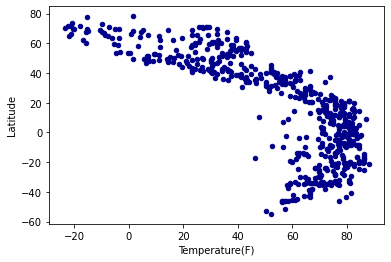

In [13]:
temp_plt = weather_df.plot.scatter(x='Temperature(F)',
                      y='Latitude',
                      c='DarkBlue')

In [14]:
# In the above cell, each city is plotted according to it's latitude and temperature in Fahrenheit.

## Latitude vs. Humidity Plot

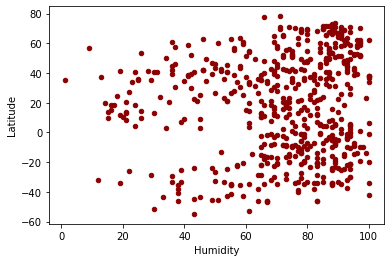

In [15]:
humidity_plt = weather_df.plot.scatter(x='Humidity',
                      y='Latitude',
                      c='DarkRed')

In [16]:
# In the above cell, each city is plotted according to it's latitude and humidity percentage.

## Latitude vs. Cloudiness Plot

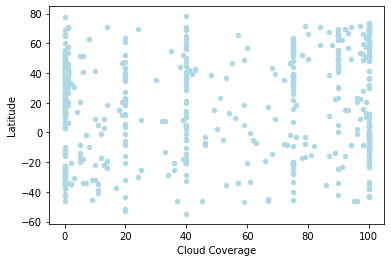

In [17]:
cloud_plt = weather_df.plot.scatter(x='Cloud Coverage',
                      y='Latitude',
                      c='LightBlue')

In [18]:
# In the above cell, each city is plotted according to it's latitude and cloud coverage percentage.

## Latitude vs. Wind Speed Plot

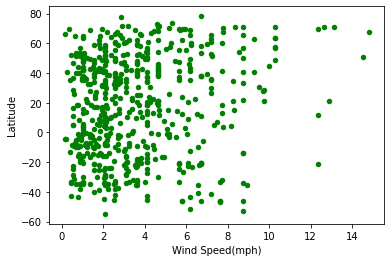

In [19]:
wind_plt = weather_df.plot.scatter(x='Wind Speed(mph)',
                      y='Latitude',
                      c='Green')

In [20]:
# In the above cell, each city is plotted according to it's latitude and wind speed(mph).

## Linear Regression

In [21]:
# create new dataframes from weather_df for northern and southern hemispheres
southern_hemi_df = weather_df.loc[(weather_df['Latitude']) <= 0]
northern_hemi_df = weather_df.loc[(weather_df['Latitude']) >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

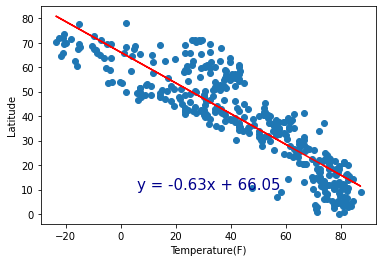

In [22]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Temperature(F)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="darkblue")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

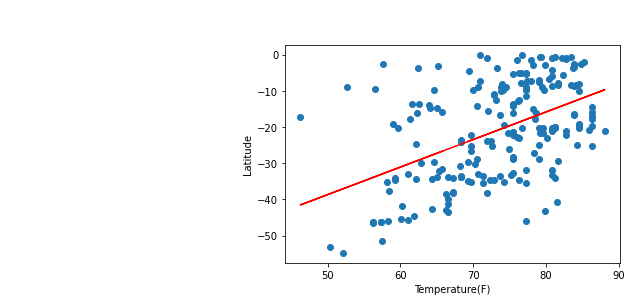

In [23]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Temperature(F)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

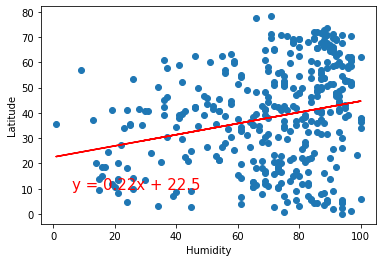

In [24]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

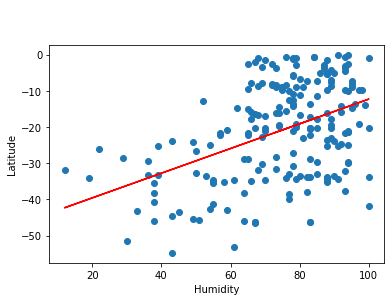

In [25]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

In [26]:
# The correlation between latitude and humidity (while still present) is minimal.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

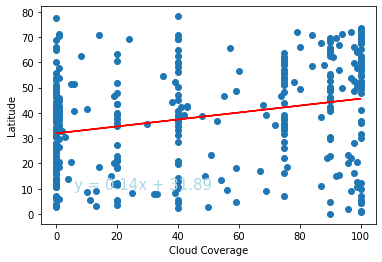

In [27]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Cloud Coverage']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="lightblue")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

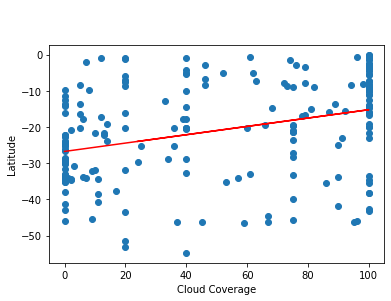

In [28]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Cloud Coverage']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="lightblue")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

In [29]:
# There is no correlation between a city's cloud coverage and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

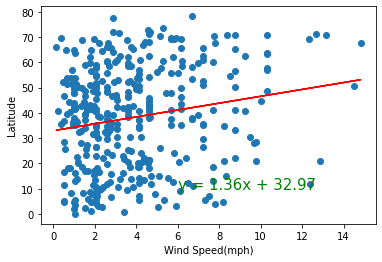

In [30]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Wind Speed(mph)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

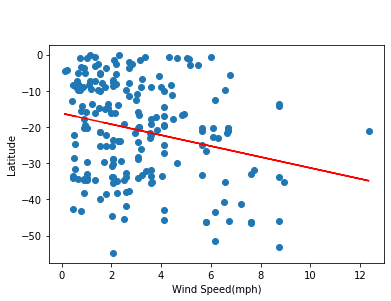

In [31]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Wind Speed(mph)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

In [32]:
# There is no correlation between a city's latitude wind speed.